CSCI-GA.3033-​076 Vision Meets Machine Learning Assignment-3

In this assignment, you will use the pretrained fast rcnn for the object detection and classification 

Submission Info

You should make a copy of this Colab (File->Save a copy in Drive). Please start the assignment early and don’t be afraid to ask for help from either the TAs or myself. You are allowed to collaborate with other students in terms discussing ideas and possible solutions. However you code up the solution yourself, i.e. you must write your own code. Copying your friends code and just changing all the names of the variables is not allowed! You are not allowed to use solutions from similar assignments in courses from other institutions, or those found elsewhere on the web. Your solutions should be submitted via the NYU classes system.

In [ ]:
import torchvision.transforms as transforms
import cv2
import numpy
import numpy as np
import torchvision
import torch
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
coco_names = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

COLORS = np.random.uniform(0, 255, size=(len(coco_names), 3))

transform = transforms.Compose([
    transforms.ToTensor(),
])

In [ ]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained= True)
model.eval()
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)
model = model.to(device)

cuda


Question-1. Completer the following predict function (20 Points)

In [ ]:
def predict(image, model, device, detection_threshold):
  # torchmodel.device, thresh
    # transform the image to tensor
    image = transform(image).to(device)
    image = image.unsqueeze(0) # add a batch dimension
    outputs = model(image) # get the predictions on the image

    """complete the following line to get all the predicited class names"""
    pred_classes = [coco_names[i] for i in outputs[0]['labels'].cpu().numpy()]
    """complete the following line to get score for all the predicted objects"""
    pred_scores = outputs[0]['scores'].detach().cpu().numpy()
    """complete the following line to get predicted bounding boxes"""
    pred_bboxes = outputs[0]['boxes'].detach().cpu().numpy()
    # get boxes above the threshold score
    boxes = pred_bboxes[pred_scores >= detection_threshold].astype(np.int32)
    return boxes, pred_classes, outputs[0]['labels']

In [ ]:
def draw_boxes(boxes, classes, labels, image):
    # read the image with OpenCV
    image = cv2.cvtColor(np.asarray(image), cv2.COLOR_BGR2RGB)
    for i, box in enumerate(boxes):
        color = COLORS[labels[i]]
        cv2.rectangle(
            image,
            (int(box[0]), int(box[1])),
            (int(box[2]), int(box[3])),
            color, 2
        )
        cv2.putText(image, classes[i], (int(box[0]), int(box[1]-5)),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2, 
                    lineType=cv2.LINE_AA)
    return image

Question-2. Use 10 images of your choice and run the object detection model on these images showing the result of detection. (30 Points)

(tensor([[[0.9647, 0.9922, 0.9961,  ..., 0.9686, 0.9961, 0.9843],
         [0.9804, 0.9882, 0.9725,  ..., 0.9765, 0.9961, 1.0000],
         [0.9843, 0.9804, 0.9686,  ..., 0.9647, 1.0000, 0.9804],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 0.9961, 0.9961, 0.9922],
         [0.9961, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 0.9961, 0.9961,  ..., 0.9961, 1.0000, 1.0000]],

        [[0.9882, 1.0000, 1.0000,  ..., 0.9765, 1.0000, 0.9922],
         [1.0000, 1.0000, 0.9922,  ..., 0.9843, 1.0000, 1.0000],
         [1.0000, 1.0000, 0.9882,  ..., 0.9647, 1.0000, 0.9804],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 0.9922, 0.9922, 0.9882],
         [0.9961, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 0.9961, 0.9961,  ..., 0.9961, 1.0000, 1.0000]],

        [[0.9490, 0.9686, 0.9725,  ..., 0.9569, 0.9843, 0.9725],
         [0.9725, 0.9804, 0.9647,  ..., 0.9725, 0.9922, 0.9922],
         [0.9882, 0.9843, 0.9725,  ..., 0.9647, 1.0000, 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


(3, 120, 160)
(3, 120, 160)
(3, 120, 160)
(3, 120, 160)
(3, 120, 160)
(3, 120, 160)
(3, 120, 160)
(3, 120, 160)


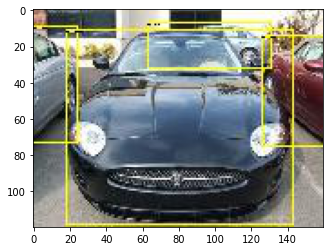

In [ ]:
# Loading dataset
# trainset = torchvision.datasets.CIFAR10(root='./data', train=True,

img = torchvision.datasets.ImageFolder(root='/content/data/voc', transform=transform)
print(img[0])
plt.figure()
image_num = 10
for i in range(image_num):
  image,label = img[i][0].numpy(), img[i][1]
  print(image.shape)
  image = image.transpose(1, 2, 0)
  bounding_boxes, label, img_classes = predict(image, model, device, 0.2)
  plt.subplot()
  plt.imshow(image)
plt.show()